In [1]:
%matplotlib inline

import math
import time
import os
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import beta
from scipy.ndimage.interpolation import shift
import seaborn as sns

In [38]:
from pathlib import Path

commondir = './simresults/'
Path(commondir + "images").mkdir(parents=True, exist_ok=True)

In [3]:
def NormalizeUtility(val, numplayers):
    return   (0.5/numplayers - val)/(0.5/numplayers)


# Sim Beta

In [8]:
####################
# Sim Beta
####################
dir = commondir + 'sim-beta/results'

# History length
historyLenArray = [100] 
alpha = 1 


# Number of players
numplayersArray = [64]

# betafactor (dishonest beta factor) Array
betafactorArray = [1.05, 1.1, 1.2, 1.3, 1.4, 1.5]

# Number of Liars
numLiarsArray = [1]

# Number of clusters
numclustersArray = [8]


if not os.path.exists(dir):
    os.mkdir(dir)
    
frames=[]    
for idx0, historyLen in enumerate(historyLenArray):
    for idx1, numclusters in enumerate(numclustersArray):
        for idx2, numplayers in enumerate(numplayersArray):
            for idx3, betaFactor in enumerate(betafactorArray):
                for idx4, numLiars in enumerate(numLiarsArray):
                    if (int(numplayers/numclusters) < 2 or numplayers <= numLiars):
                        continue

                    rounds = historyLen*10
                    file_name = 'QPQRst-{0}-{1}-{2}-{3}-{4}-{5}-{6}.csv'.format(str(numplayers),str(numclusters),str(rounds),str(betaFactor),str(numLiars),str(historyLen), "*")
                    search_path = os.path.join(dir, file_name)
                    for fname in glob.glob(search_path):
                        # print("Reading file ", fname," using numplayers =", numplayers, 
                        #      " numclusters = ", numclusters, " numLiars = ", numLiars, " betafactor = ", betaFactor, " and historyLen = ", historyLen)
                        tmpdf = pd.read_csv(fname)
                        frames.append(tmpdf)
                                    
df = pd.concat(frames, ignore_index=True)
df.head(20)

,players,clusters,playerperclusters,numliars,QPQversion,alpha,rounds,betafactor,QPQHL,QPQTH,...,QPQ2HL1,QPQ2TH1,UtilityHonest,UtilityDishonest,FNTotalHonest,FNTotalDishonest,UtilityHonest_HL,UtilityDishonest_HL,FNTotalHonest_HL,FNTotalDishonest_HL
0,64,8,64,1,1,NaN,1000,1.05,100,0.97,...,NaN,NaN,0.000270,0.000135,0.008794,0.055,0.000274,0.000130,0.008818,0.061111
1,64,8,8,1,2,1.0,1000,1.05,100,0.97,...,400.0,0.981637,0.000257,0.000135,0.000317,0.000,0.000262,0.000130,0.000335,0.000000
2,64,8,64,1,1,NaN,1000,1.05,100,0.97,...,NaN,NaN,0.000324,0.000830,0.011222,0.055,0.000333,0.000906,0.011693,0.061111
3,64,8,8,1,2,1.0,1000,1.05,100,0.97,...,400.0,0.981637,0.000274,0.000906,0.011143,0.000,0.000278,0.000991,0.012363,0.000000
4,64,8,64,1,1,NaN,1000,1.05,100,0.97,...,NaN,NaN,0.000335,0.000053,0.010333,0.009,0.000326,0.000059,0.010617,0.008889
5,64,8,8,1,2,1.0,1000,1.05,100,0.97,...,400.0,0.981637,0.000265,0.000053,0.001635,0.000,0.000262,0.000059,0.001252,0.000000
6,64,8,64,1,1,NaN,1000,1.05,100,0.97,...,NaN,NaN,0.000320,0.000604,0.011746,0.009,0.000323,0.000664,0.012169,0.010000
7,64,8,8,1,2,1.0,1000,1.05,100,0.97,...,400.0,0.981637,0.000266,0.000254,0.000000,0.000,0.000266,0.000276,0.000000,0.000000
8,64,8,64,1,1,NaN,1000,1.05,100,0.97,...,NaN,NaN,0.000290,0.000200,0.010540,0.001,0.000298,0.000153,0.011146,0.001111
9,64,8,8,1,2,1.0,1000,1.05,100,0.97,...,400.0,0.981637,0.000264,0.000200,0.000603,0.000,0.000250,0.000153,0.000000,0.000000


In [9]:
writer = pd.ExcelWriter(commondir + 'SimBeta.xlsx', engine='xlsxwriter')
df.to_excel(writer,index=False)
writer.save()

In [23]:
####################
# Sim Beta
####################
for idx0, historyLen in enumerate(historyLenArray):
    for idx1, numclusters in enumerate(numclustersArray):
        for idx2, numplayers in enumerate(numplayersArray):
            for idx3, betaFactor in enumerate(betafactorArray):
                for idx4, numLiars in enumerate(numLiarsArray):
                    if (int(numplayers/numclusters) < 2 or numplayers <= numLiars):
                        continue

                    dfTmp1 = df[(df.QPQversion == 1) & (df.players == numplayers) & (df.clusters == numclusters) & (df.betafactor == betaFactor)]
                    dfTmp2 = df[(df.QPQversion == 2) & (df.players == numplayers) & (df.clusters == numclusters) & (df.betafactor == betaFactor)]

                    dfTmp1Mix = dfTmp1[(dfTmp1.numliars == 1)]
                    dfTmp2Mix = dfTmp2[(dfTmp2.numliars == 1)]

                    UtilityMixHonests1 = dfTmp1Mix.UtilityHonest.mean()
                    UtilityMixHonests2 = dfTmp2Mix.UtilityHonest.mean()
                    if (numLiars > 0):
                        UtilityMixDishonests1 = dfTmp1Mix.UtilityDishonest.mean()
                        UtilityMixDishonests2 = dfTmp2Mix.UtilityDishonest.mean()
                        
                    
                    print("\nSimulation using numplayers =", numplayers, " numclusters = ", numclusters, 
                          " numLiars = ", numLiars, " betafactor = ", betaFactor, " and historyLen = ", historyLen)
                    
                    if dfTmp1.UtilityHonest.empty or dfTmp2.UtilityHonest.empty:
                        print("\tDataFrame is empty!")
                        continue
                    else:
                        print("\tDataFrame has", len( dfTmp1.UtilityHonest), " simulations.")
                        
                    if (numLiars > 0):
                        print("\n\tPlayer Utility QPQ. Honest players: {:.5f}, Dishonest player: {:.5f}".format(UtilityMixHonests1, UtilityMixDishonests1))
                        print("\tPlayer Utility QPQ2. Honest players: {:.5f}, Dishonest player: {:.5f}".format(UtilityMixHonests2, UtilityMixDishonests2))
                        print("\tPlayer Utility Ratio QPQ/QPQ2. Honest players: {:.5f}, Dishonest player: {:.5f}".format(UtilityMixHonests1/UtilityMixHonests2, UtilityMixDishonests1/UtilityMixDishonests2))


Simulation using numplayers = 64  numclusters =  8  numLiars =  1  betafactor =  1.05  and historyLen =  100
	DataFrame has 5000  simulations.

	Player Utility QPQ. Honest players: 0.00033, Dishonest player: 0.00030
	Player Utility QPQ2. Honest players: 0.00029, Dishonest player: 0.00028
	Player Utility Ratio QPQ/QPQ2. Honest players: 1.14320, Dishonest player: 1.07214

Simulation using numplayers = 64  numclusters =  8  numLiars =  1  betafactor =  1.1  and historyLen =  100
	DataFrame has 5000  simulations.

	Player Utility QPQ. Honest players: 0.00033, Dishonest player: 0.00034
	Player Utility QPQ2. Honest players: 0.00029, Dishonest player: 0.00043
	Player Utility Ratio QPQ/QPQ2. Honest players: 1.14072, Dishonest player: 0.80503

Simulation using numplayers = 64  numclusters =  8  numLiars =  1  betafactor =  1.2  and historyLen =  100
	DataFrame has 5000  simulations.

	Player Utility QPQ. Honest players: 0.00033, Dishonest player: 0.00064
	Player Utility QPQ2. Honest players: 0

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


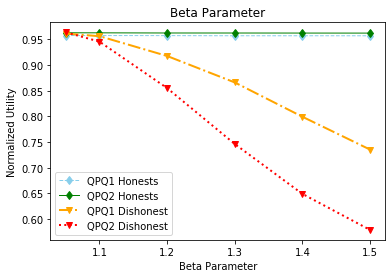

In [7]:
####################
# Sim Beta
####################
simresults = {'UtilityHonests1': [], 'UtilityHonests2': [], 'QPQ/QPQ2_Honests': [], 
              'UtilityDishonests1': [], 'UtilityDishonests2': [], 'QPQ/QPQ2_Dishonests': [],
              'confidence_intervalHonestsLow1': [], 'confidence_intervalHonestsLow2': [],
              'confidence_intervalDishonestsLow1': [], 'confidence_intervalDishonestsLow2': [],
              'confidence_intervalHonestsHigh1': [], 'confidence_intervalHonestsHigh2': [],
              'confidence_intervalDishonestsHigh1': [], 'confidence_intervalDishonestsHigh2': [],
              'betaFactor': [] 
             }
for idx0, historyLen in enumerate(historyLenArray):
    for idx1, numclusters in enumerate(numclustersArray):
        for idx2, numplayers in enumerate(numplayersArray):
            for idx3, betaFactor in enumerate(betafactorArray):
                for idx4, numLiars in enumerate(numLiarsArray):
                    if (int(numplayers/numclusters) < 2 or numplayers <= numLiars):
                        continue
         
                    dfTmp1 = df[(df.QPQversion == 1) & (df.players == numplayers) & (df.clusters == numclusters) & (df.betafactor == betaFactor) & (df.numliars == numLiars)]
                    dfTmp2 = df[(df.QPQversion == 2) & (df.players == numplayers) & (df.clusters == numclusters) & (df.betafactor == betaFactor) & (df.numliars == numLiars)]
                    
                    UtilityHonests1 = dfTmp1.UtilityHonest.mean()
                    UtilityHonests2 = dfTmp2.UtilityHonest.mean()

                    simresults['UtilityHonests1'].append(NormalizeUtility(UtilityHonests1, numplayers))
                    simresults['UtilityHonests2'].append(NormalizeUtility(UtilityHonests2 , numplayers))
                    simresults['QPQ/QPQ2_Honests'].append(UtilityHonests1/UtilityHonests2)

                    if (numLiars > 0):
                        UtilityMixDishonests1 = dfTmp1.UtilityDishonest.mean()
                        UtilityMixDishonests2 = dfTmp2.UtilityDishonest.mean()

                        simresults['UtilityDishonests1'].append(NormalizeUtility(UtilityMixDishonests1, numplayers))
                        simresults['UtilityDishonests2'].append(NormalizeUtility(UtilityMixDishonests2, numplayers))
                        simresults['QPQ/QPQ2_Dishonests'].append(UtilityMixDishonests1/UtilityMixDishonests2)
                    else:
                        simresults['UtilityDishonests1'].append(0)
                        simresults['UtilityDishonests2'].append(0)
                        simresults['QPQ/QPQ2_Dishonests'].append(1)

                    simresults['betaFactor'].append(betaFactor)
                    
rst = pd.DataFrame(data=simresults) 
# multiple line plot
plt.plot( 'betaFactor', 'UtilityHonests1', data=rst, marker='d', color='skyblue', linestyle='--', linewidth=1, label="QPQ1 Honests")
plt.plot( 'betaFactor', 'UtilityHonests2', data=rst, marker='d', color='green', linestyle='-', linewidth=1, label="QPQ2 Honests")
plt.plot( 'betaFactor', 'UtilityDishonests1', data=rst, marker='v', color='orange', linestyle='-.', linewidth=2, label="QPQ1 Dishonest")
plt.plot( 'betaFactor', 'UtilityDishonests2', data=rst, marker='v', color='red', linestyle=':', linewidth=2, label="QPQ2 Dishonest")
plt.title("Beta Parameter")
plt.xlabel("Beta Parameter")
plt.ylabel("Normalized Utility");
plt.legend()
#plt.savefig(commondir + 'images/betaparameter.eps', format='eps')
plt.savefig(commondir + 'images/betaparameter.pdf', format='pdf')

Note: 1.05 seems to be the detection limit of qpq and qpq2. We propose to expand the history of this scenario to see if it improves QPQ2

# Sim Clusters

In [25]:
####################
# Sim Cluster
####################
dir = commondir + 'sim-clusters/results'

# History length
historyLenArray = [100] 
alpha = 1 


# Number of players
numplayersArray = [64]

# betafactor (dishonest beta factor) Array
betafactorArray = [1.2]

# Number of Liars
numLiarsArray = [1]

# Number of clusters
numclustersArray = [2, 4, 8, 16, 32]


if not os.path.exists(dir):
    os.mkdir(dir)
    
frames=[]    
for idx0, historyLen in enumerate(historyLenArray):
    for idx1, numclusters in enumerate(numclustersArray):
        for idx2, numplayers in enumerate(numplayersArray):
            for idx3, betaFactor in enumerate(betafactorArray):
                for idx4, numLiars in enumerate(numLiarsArray):
                    if (int(numplayers/numclusters) < 2 or numplayers <= numLiars):
                        continue

                    rounds = historyLen*10
                    file_name = 'QPQRst-{0}-{1}-{2}-{3}-{4}-{5}-{6}.csv'.format(str(numplayers),str(numclusters),str(rounds),str(betaFactor),str(numLiars),str(historyLen), "*")
                    search_path = os.path.join(dir, file_name)
                    for fname in glob.glob(search_path):
                        # print("Reading file ", fname," using numplayers =", numplayers, 
                        #     " numclusters = ", numclusters, " numLiars = ", numLiars, " betafactor = ", betaFactor, " and historyLen = ", historyLen)
                        tmpdf = pd.read_csv(fname)
                        frames.append(tmpdf)
                                    
df = pd.concat(frames, ignore_index=True)
df.head(20)

,players,clusters,playerperclusters,numliars,QPQversion,alpha,rounds,betafactor,QPQHL,QPQTH,...,QPQ2HL1,QPQ2TH1,UtilityHonest,UtilityDishonest,FNTotalHonest,FNTotalDishonest,UtilityHonest_HL,UtilityDishonest_HL,FNTotalHonest_HL,FNTotalDishonest_HL
0,64,2,64,1,1,NaN,1000,1.2,100,0.97,...,NaN,NaN,0.000307,0.000760,0.012349,0.104,0.000312,0.000833,0.013069,0.115556
1,64,2,32,1,2,1.0,1000,1.2,100,0.97,...,188.0,0.983929,0.000296,0.000801,0.000000,0.000,0.000299,0.000878,0.000000,0.000000
2,64,2,64,1,1,NaN,1000,1.2,100,0.97,...,NaN,NaN,0.000351,0.000090,0.012444,0.056,0.000345,0.000082,0.013122,0.062222
3,64,2,32,1,2,1.0,1000,1.2,100,0.97,...,188.0,0.983929,0.000314,0.000794,0.000048,0.000,0.000320,0.000864,0.000000,0.000000
4,64,2,64,1,1,NaN,1000,1.2,100,0.97,...,NaN,NaN,0.000352,0.000088,0.016444,0.031,0.000365,0.000080,0.017707,0.034444
5,64,2,32,1,2,1.0,1000,1.2,100,0.97,...,188.0,0.983929,0.000307,0.000088,0.000000,0.000,0.000316,0.000080,0.000000,0.000000
6,64,2,64,1,1,NaN,1000,1.2,100,0.97,...,NaN,NaN,0.000303,0.000073,0.011603,0.033,0.000289,0.000081,0.011640,0.026667
7,64,2,32,1,2,1.0,1000,1.2,100,0.97,...,188.0,0.983929,0.000280,0.000919,0.000000,0.000,0.000283,0.001022,0.000000,0.000000
8,64,2,64,1,1,NaN,1000,1.2,100,0.97,...,NaN,NaN,0.000381,0.000849,0.013333,0.055,0.000396,0.000090,0.013563,0.045556
9,64,2,32,1,2,1.0,1000,1.2,100,0.97,...,188.0,0.983929,0.000350,0.000582,0.008873,0.000,0.000361,0.000646,0.009859,0.000000


In [27]:
writer = pd.ExcelWriter(commondir + 'SimCluster.xlsx', engine='xlsxwriter')
df.to_excel(writer,index=False)
writer.save()

In [26]:
####################
# Sim Cluster
####################
for idx0, historyLen in enumerate(historyLenArray):
    for idx1, numclusters in enumerate(numclustersArray):
        for idx2, numplayers in enumerate(numplayersArray):
            for idx3, betaFactor in enumerate(betafactorArray):
                for idx4, numLiars in enumerate(numLiarsArray):
                    if (int(numplayers/numclusters) < 2 or numplayers <= numLiars):
                        continue

                    dfTmp1 = df[(df.QPQversion == 1) & (df.players == numplayers) & (df.clusters == numclusters) & (df.betafactor == betaFactor)]
                    dfTmp2 = df[(df.QPQversion == 2) & (df.players == numplayers) & (df.clusters == numclusters) & (df.betafactor == betaFactor)]

                    dfTmp1Mix = dfTmp1[(dfTmp1.numliars == 1)]
                    dfTmp2Mix = dfTmp2[(dfTmp2.numliars == 1)]

                    UtilityMixHonests1 = dfTmp1Mix.UtilityHonest.mean()
                    UtilityMixHonests2 = dfTmp2Mix.UtilityHonest.mean()
                    if (numLiars > 0):
                        UtilityMixDishonests1 = dfTmp1Mix.UtilityDishonest.mean()
                        UtilityMixDishonests2 = dfTmp2Mix.UtilityDishonest.mean()

                    print("\nSimulation using numplayers =", numplayers, " numclusters = ", numclusters, 
                          " numLiars = ", numLiars, " betafactor = ", betaFactor, " and historyLen = ", historyLen)
                    if dfTmp1.UtilityHonest.empty or dfTmp2.UtilityHonest.empty:
                        print("\tDataFrame is empty!")
                        continue
                    else:
                        print("\tDataFrame has", len( dfTmp1.UtilityHonest), " simulations.")
                    
                    if (numLiars > 0):
                        print("\n\tPlayer Utility QPQ. Honest players: {:.5f}, Dishonest player: {:.5f}".format(UtilityMixHonests1, UtilityMixDishonests1))
                        print("\tPlayer Utility QPQ2. Honest players: {:.5f}, Dishonest player: {:.5f}".format(UtilityMixHonests2, UtilityMixDishonests2))
                        print("\tPlayer Utility Ratio QPQ/QPQ2. Honest players: {:.5f}, Dishonest player: {:.5f}".format(UtilityMixHonests1/UtilityMixHonests2, UtilityMixDishonests1/UtilityMixDishonests2))


Simulation using numplayers = 64  numclusters =  2  numLiars =  1  betafactor =  1.2  and historyLen =  100
	DataFrame has 4400  simulations.

	Player Utility QPQ. Honest players: 0.00034, Dishonest player: 0.00064
	Player Utility QPQ2. Honest players: 0.00030, Dishonest player: 0.00068
	Player Utility Ratio QPQ/QPQ2. Honest players: 1.13594, Dishonest player: 0.93034

Simulation using numplayers = 64  numclusters =  4  numLiars =  1  betafactor =  1.2  and historyLen =  100
	DataFrame has 4400  simulations.

	Player Utility QPQ. Honest players: 0.00034, Dishonest player: 0.00062
	Player Utility QPQ2. Honest players: 0.00029, Dishonest player: 0.00095
	Player Utility Ratio QPQ/QPQ2. Honest players: 1.15822, Dishonest player: 0.65774

Simulation using numplayers = 64  numclusters =  8  numLiars =  1  betafactor =  1.2  and historyLen =  100
	DataFrame has 4350  simulations.

	Player Utility QPQ. Honest players: 0.00033, Dishonest player: 0.00062
	Player Utility QPQ2. Honest players: 0.

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


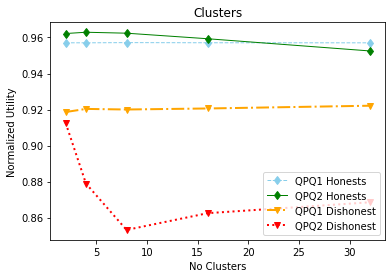

In [11]:
####################
# Sim Cluster
####################
simresults = {'UtilityHonests1': [], 'UtilityHonests2': [], 'QPQ/QPQ2_Honests': [], 
              'UtilityDishonests1': [], 'UtilityDishonests2': [], 'QPQ/QPQ2_Dishonests': [],
              'confidence_intervalHonestsLow1': [], 'confidence_intervalHonestsLow2': [],
              'confidence_intervalDishonestsLow1': [], 'confidence_intervalDishonestsLow2': [],
              'confidence_intervalHonestsHigh1': [], 'confidence_intervalHonestsHigh2': [],
              'confidence_intervalDishonestsHigh1': [], 'confidence_intervalDishonestsHigh2': [],
              'numclusters': [] 
             }
for idx0, historyLen in enumerate(historyLenArray):
    for idx1, numclusters in enumerate(numclustersArray):
        for idx2, numplayers in enumerate(numplayersArray):
            for idx3, betaFactor in enumerate(betafactorArray):
                for idx4, numLiars in enumerate(numLiarsArray):
                    if (int(numplayers/numclusters) < 2 or numplayers <= numLiars):
                        continue
         
                    dfTmp1 = df[(df.QPQversion == 1) & (df.players == numplayers) & (df.clusters == numclusters) & (df.betafactor == betaFactor) & (df.numliars == numLiars)]
                    dfTmp2 = df[(df.QPQversion == 2) & (df.players == numplayers) & (df.clusters == numclusters) & (df.betafactor == betaFactor) & (df.numliars == numLiars)]
                    
                    UtilityHonests1 = dfTmp1.UtilityHonest.mean()
                    UtilityHonests2 = dfTmp2.UtilityHonest.mean()

                    simresults['UtilityHonests1'].append(NormalizeUtility(UtilityHonests1, numplayers))
                    simresults['UtilityHonests2'].append(NormalizeUtility(UtilityHonests2, numplayers))
                    simresults['QPQ/QPQ2_Honests'].append(UtilityHonests1/UtilityHonests2)

                    if (numLiars > 0):
                        UtilityMixDishonests1 = dfTmp1.UtilityDishonest.mean()
                        UtilityMixDishonests2 = dfTmp2.UtilityDishonest.mean()

                        simresults['UtilityDishonests1'].append(NormalizeUtility(UtilityMixDishonests1, numplayers))
                        simresults['UtilityDishonests2'].append(NormalizeUtility(UtilityMixDishonests2, numplayers))
                        simresults['QPQ/QPQ2_Dishonests'].append(UtilityMixDishonests1/UtilityMixDishonests2)
                    else:
                        simresults['UtilityDishonests1'].append(0)
                        simresults['UtilityDishonests2'].append(0)
                        simresults['QPQ/QPQ2_Dishonests'].append(1)

                    simresults['numclusters'].append(numclusters)
                    
rst = pd.DataFrame(data=simresults)
# multiple line plot
plt.plot( 'numclusters', 'UtilityHonests1', data=rst, marker='d', color='skyblue', linestyle='--', linewidth=1, label="QPQ1 Honests")
plt.plot( 'numclusters', 'UtilityHonests2', data=rst, marker='d', color='green', linestyle='-', linewidth=1, label="QPQ2 Honests")
plt.plot( 'numclusters', 'UtilityDishonests1', data=rst, marker='v', color='orange', linestyle='-.', linewidth=2, label="QPQ1 Dishonest")
plt.plot( 'numclusters', 'UtilityDishonests2', data=rst, marker='v', color='red', linestyle=':', linewidth=2, label="QPQ2 Dishonest")
plt.title("Clusters")
plt.xlabel("No Clusters")
plt.ylabel("Normalized Utility");
plt.legend()
#plt.savefig(commondir + 'images/noclusters.eps', format='eps')
plt.savefig(commondir + 'images/noclusters.pdf', format='pdf')

Note: it seems that the optimal value of QPQ 2 corresponds to 8 clusters. Number of players is the same as the number of the cluster. The KS test is identical in both directions.
We propose to do a simulation with more players and more clusters to see if it is still valid that the optimal one is in Sqrt (players).

In [6]:
####################
# Sim Cluster 2
####################
dir = commondir + 'sim-clusters-256players-v2/results'

# History length
historyLenArray = [100] 
alpha = 1 


# Number of players
numplayersArray = [256]

# betafactor (dishonest beta factor) Array
betafactorArray = [1.2]

# Number of Liars
numLiarsArray = [1]

# Number of clusters
numclustersArray = [2, 4, 8, 16, 32, 64, 128]


if not os.path.exists(dir):
    os.mkdir(dir)
    
frames=[]    
for idx0, historyLen in enumerate(historyLenArray):
    for idx1, numclusters in enumerate(numclustersArray):
        for idx2, numplayers in enumerate(numplayersArray):
            for idx3, betaFactor in enumerate(betafactorArray):
                for idx4, numLiars in enumerate(numLiarsArray):
                    if (int(numplayers/numclusters) < 2 or numplayers <= numLiars):
                        continue

                    rounds = historyLen*10
                    file_name = 'QPQRst-{0}-{1}-{2}-{3}-{4}-{5}-{6}.csv'.format(str(numplayers),str(numclusters),str(rounds),str(betaFactor),str(numLiars),str(historyLen), "*")
                    search_path = os.path.join(dir, file_name)
                    for fname in glob.glob(search_path):
                        # print("Reading file ", fname," using numplayers =", numplayers, 
                        #     " numclusters = ", numclusters, " numLiars = ", numLiars, " betafactor = ", betaFactor, " and historyLen = ", historyLen)
                        tmpdf = pd.read_csv(fname)
                        frames.append(tmpdf)
                                    
df = pd.concat(frames, ignore_index=True)
df.head(20)

,FNTotalDishonest,FNTotalDishonest_HL,FNTotalHonest,FNTotalHonest_HL,QPQ2HL0,QPQ2HL1,QPQ2TH0,QPQ2TH1,QPQHL,QPQTH,...,UtilityDishonest_HL,UtilityHonest,UtilityHonest_HL,alpha,betafactor,clusters,numliars,playerperclusters,players,rounds
0,0.049,0.001111,0.011110,0.011678,NaN,NaN,NaN,NaN,100,0.97,...,4.894691e-05,0.000033,0.000036,NaN,1.2,2,1,256,256,1000
1,0.000,0.000000,0.000000,0.000000,196.0,196.0,0.98458,0.98458,100,0.97,...,4.894691e-05,0.000020,0.000023,1.0,1.2,2,1,128,256,1000
2,0.022,0.025556,0.011192,0.011181,NaN,NaN,NaN,NaN,100,0.97,...,6.236482e-05,0.000030,0.000029,NaN,1.2,2,1,256,256,1000
3,0.000,0.000000,0.000000,0.000000,196.0,196.0,0.98458,0.98458,100,0.97,...,3.899925e-05,0.000024,0.000024,1.0,1.2,2,1,128,256,1000
4,0.067,0.030000,0.011663,0.011804,NaN,NaN,NaN,NaN,100,0.97,...,1.096318e-05,0.000039,0.000042,NaN,1.2,2,1,256,256,1000
5,0.000,0.000000,0.000008,0.000000,196.0,196.0,0.98458,0.98458,100,0.97,...,1.096318e-05,0.000022,0.000022,1.0,1.2,2,1,128,256,1000
6,0.078,0.020000,0.012486,0.013011,NaN,NaN,NaN,NaN,100,0.97,...,9.224149e-07,0.000028,0.000029,NaN,1.2,2,1,256,256,1000
7,0.000,0.000000,0.000004,0.000000,196.0,196.0,0.98458,0.98458,100,0.97,...,5.940444e-06,0.000025,0.000026,1.0,1.2,2,1,128,256,1000
8,0.098,0.024444,0.010996,0.011599,NaN,NaN,NaN,NaN,100,0.97,...,3.366493e-05,0.000035,0.000037,NaN,1.2,2,1,256,256,1000
9,0.000,0.000000,0.000008,0.000000,196.0,196.0,0.98458,0.98458,100,0.97,...,3.366493e-05,0.000027,0.000030,1.0,1.2,2,1,128,256,1000


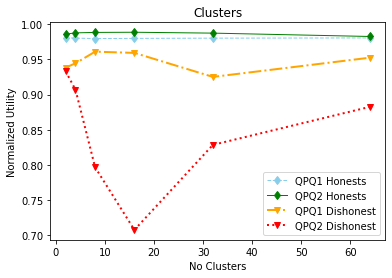

In [7]:
####################
# Sim Cluster
####################
simresults = {'UtilityHonests1': [], 'UtilityHonests2': [], 'QPQ/QPQ2_Honests': [], 
              'UtilityDishonests1': [], 'UtilityDishonests2': [], 'QPQ/QPQ2_Dishonests': [],
              'confidence_intervalHonestsLow1': [], 'confidence_intervalHonestsLow2': [],
              'confidence_intervalDishonestsLow1': [], 'confidence_intervalDishonestsLow2': [],
              'confidence_intervalHonestsHigh1': [], 'confidence_intervalHonestsHigh2': [],
              'confidence_intervalDishonestsHigh1': [], 'confidence_intervalDishonestsHigh2': [],
              'numclusters': [] 
             }
for idx0, historyLen in enumerate(historyLenArray):
    for idx1, numclusters in enumerate(numclustersArray):
        for idx2, numplayers in enumerate(numplayersArray):
            for idx3, betaFactor in enumerate(betafactorArray):
                for idx4, numLiars in enumerate(numLiarsArray):
                    if (int(numplayers/numclusters) < 2 or numplayers <= numLiars):
                        continue
         
                    dfTmp1 = df[(df.QPQversion == 1) & (df.players == numplayers) & (df.clusters == numclusters) & (df.betafactor == betaFactor) & (df.numliars == numLiars)]
                    dfTmp2 = df[(df.QPQversion == 2) & (df.players == numplayers) & (df.clusters == numclusters) & (df.betafactor == betaFactor) & (df.numliars == numLiars)]
                    
                    UtilityHonests1 = dfTmp1.UtilityHonest.mean()
                    UtilityHonests2 = dfTmp2.UtilityHonest.mean()

                    simresults['UtilityHonests1'].append(NormalizeUtility(UtilityHonests1, numplayers))
                    simresults['UtilityHonests2'].append(NormalizeUtility(UtilityHonests2, numplayers))
                    simresults['QPQ/QPQ2_Honests'].append(UtilityHonests1/UtilityHonests2)

                    if (numLiars > 0):
                        UtilityMixDishonests1 = dfTmp1.UtilityDishonest.mean()
                        UtilityMixDishonests2 = dfTmp2.UtilityDishonest.mean()

                        simresults['UtilityDishonests1'].append(NormalizeUtility(UtilityMixDishonests1, numplayers))
                        simresults['UtilityDishonests2'].append(NormalizeUtility(UtilityMixDishonests2, numplayers))
                        simresults['QPQ/QPQ2_Dishonests'].append(UtilityMixDishonests1/UtilityMixDishonests2)
                    else:
                        simresults['UtilityDishonests1'].append(0)
                        simresults['UtilityDishonests2'].append(0)
                        simresults['QPQ/QPQ2_Dishonests'].append(1)

                    simresults['numclusters'].append(numclusters)
                    
rst = pd.DataFrame(data=simresults)
# multiple line plot
plt.plot( 'numclusters', 'UtilityHonests1', data=rst, marker='d', color='skyblue', linestyle='--', linewidth=1, label="QPQ1 Honests")
plt.plot( 'numclusters', 'UtilityHonests2', data=rst, marker='d', color='green', linestyle='-', linewidth=1, label="QPQ2 Honests")
plt.plot( 'numclusters', 'UtilityDishonests1', data=rst, marker='v', color='orange', linestyle='-.', linewidth=2, label="QPQ1 Dishonest")
plt.plot( 'numclusters', 'UtilityDishonests2', data=rst, marker='v', color='red', linestyle=':', linewidth=2, label="QPQ2 Dishonest")
plt.title("Clusters")
plt.xlabel("No Clusters")
plt.ylabel("Normalized Utility");
plt.legend()
#plt.savefig(commondir + 'images/noclusters.eps', format='eps')
plt.savefig(commondir + 'images/noclusters256.pdf', format='pdf')

# Sim Dishonest

In [44]:
####################
# Sim Dishonest
####################
dir = commondir + 'sim-dishonest-random-v2/results'

# History length
historyLenArray = [100] 
alpha = 1 

# Number of players
numplayersArray = [64]

# betafactor (dishonest beta factor) Array
betafactorArray = [1.2]

# Number of Liars
numLiarsArray = [0, 1, 2, 3, 4, 5, 6, 7, 8]

# Number of clusters
numclustersArray = [8]


if not os.path.exists(dir):
    os.mkdir(dir)
    
frames=[]    
for idx0, historyLen in enumerate(historyLenArray):
    for idx1, numclusters in enumerate(numclustersArray):
        for idx2, numplayers in enumerate(numplayersArray):
            for idx3, betaFactor in enumerate(betafactorArray):
                for idx4, numLiars in enumerate(numLiarsArray):
                    if (int(numplayers/numclusters) < 2 or numplayers <= numLiars):
                        continue

                    rounds = historyLen*10
                    file_name = 'QPQRst-{0}-{1}-{2}-{3}-{4}-{5}-{6}.csv'.format(str(numplayers),str(numclusters),str(rounds),str(betaFactor),str(numLiars),str(historyLen), "*")
                    search_path = os.path.join(dir, file_name)
                    for fname in glob.glob(search_path):
                        #print("Reading file ", fname," using numplayers =", numplayers, 
                        #      " numclusters = ", numclusters, " numLiars = ", numLiars, " betafactor = ", betaFactor, " and historyLen = ", historyLen)
                        tmpdf = pd.read_csv(fname)
                        frames.append(tmpdf)
                                    
df = pd.concat(frames, ignore_index=True)
df.head(20)

C:\Users\AgustinSantos\Anaconda3\lib\site-packages\ipykernel_launcher.py:44: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



,FNTotalDishonest,FNTotalDishonest_HL,FNTotalHonest,FNTotalHonest_HL,QPQ2HL0,QPQ2HL1,QPQ2TH0,QPQ2TH1,QPQHL,QPQTH,...,UtilityDishonest_HL,UtilityHonest,UtilityHonest_HL,alpha,betafactor,clusters,numliars,playerperclusters,players,rounds
0,NaN,NaN,0.017422,0.018177,NaN,NaN,NaN,NaN,100,0.97,...,NaN,0.000364,0.000374,NaN,1.2,8,0,64,64,1000
1,NaN,NaN,0.000281,0.000000,400.0,400.0,0.981637,0.981637,100,0.97,...,NaN,0.000276,0.000273,1.0,1.2,8,0,8,64,1000
2,NaN,NaN,0.015359,0.016319,NaN,NaN,NaN,NaN,100,0.97,...,NaN,0.000386,0.000398,NaN,1.2,8,0,64,64,1000
3,NaN,NaN,0.006625,0.007118,400.0,400.0,0.981637,0.981637,100,0.97,...,NaN,0.000298,0.000299,1.0,1.2,8,0,8,64,1000
4,NaN,NaN,0.012266,0.012604,NaN,NaN,NaN,NaN,100,0.97,...,NaN,0.000326,0.000337,NaN,1.2,8,0,64,64,1000
5,NaN,NaN,0.000000,0.000000,400.0,400.0,0.981637,0.981637,100,0.97,...,NaN,0.000352,0.000330,1.0,1.2,8,0,8,64,1000
6,NaN,NaN,0.013094,0.013993,NaN,NaN,NaN,NaN,100,0.97,...,NaN,0.000437,0.000463,NaN,1.2,8,0,64,64,1000
7,NaN,NaN,0.000313,0.000017,400.0,400.0,0.981637,0.981637,100,0.97,...,NaN,0.000255,0.000261,1.0,1.2,8,0,8,64,1000
8,NaN,NaN,0.011484,0.011493,NaN,NaN,NaN,NaN,100,0.97,...,NaN,0.000309,0.000320,NaN,1.2,8,0,64,64,1000
9,NaN,NaN,0.013875,0.014861,400.0,400.0,0.981637,0.981637,100,0.97,...,NaN,0.000312,0.000323,1.0,1.2,8,0,8,64,1000


In [45]:
####################
# Sim Dishonest
####################
simresults = {'UtilityHonests1': [], 'UtilityHonests2': [], 'QPQ/QPQ2_Honests': [], 
              'UtilityDishonests1': [], 'UtilityDishonests2': [], 'QPQ/QPQ2_Dishonests': [],
              'confidence_intervalHonestsLow1': [], 'confidence_intervalHonestsLow2': [],
              'confidence_intervalDishonestsLow1': [], 'confidence_intervalDishonestsLow2': [],
              'confidence_intervalHonestsHigh1': [], 'confidence_intervalHonestsHigh2': [],
              'confidence_intervalDishonestsHigh1': [], 'confidence_intervalDishonestsHigh2': [],
              'numLiars': [] 
             }
for idx0, historyLen in enumerate(historyLenArray):
    for idx1, numclusters in enumerate(numclustersArray):
        for idx2, numplayers in enumerate(numplayersArray):
            for idx3, betaFactor in enumerate(betafactorArray):
                for idx4, numLiars in enumerate(numLiarsArray):
                    if (int(numplayers/numclusters) < 2 or numplayers <= numLiars):
                        continue

                    dfTmp1 = df[(df.QPQversion == 1) & (df.players == numplayers) & (df.clusters == numclusters) & (df.betafactor == betaFactor) & (df.numliars == numLiars)]
                    dfTmp2 = df[(df.QPQversion == 2) & (df.players == numplayers) & (df.clusters == numclusters) & (df.betafactor == betaFactor) & (df.numliars == numLiars)]
                    
                    UtilityHonests1 = dfTmp1.UtilityHonest.mean()
                    UtilityHonests2 = dfTmp2.UtilityHonest.mean()

                    simresults['UtilityHonests1'].append(NormalizeUtility(UtilityHonests1, numplayers))
                    simresults['UtilityHonests2'].append(NormalizeUtility(UtilityHonests2, numplayers))
                    simresults['QPQ/QPQ2_Honests'].append(UtilityHonests1/UtilityHonests2)
                    if (numLiars > 0):
                        UtilityMixDishonests1 = dfTmp1.UtilityDishonest.mean()
                        UtilityMixDishonests2 = dfTmp2.UtilityDishonest.mean()

                        simresults['UtilityDishonests1'].append(NormalizeUtility(UtilityMixDishonests1, numplayers))
                        simresults['UtilityDishonests2'].append(NormalizeUtility(UtilityMixDishonests2, numplayers))
                        simresults['QPQ/QPQ2_Dishonests'].append(UtilityMixDishonests1/UtilityMixDishonests2)
                    else:
                        simresults['UtilityDishonests1'].append(float('NaN'))
                        simresults['UtilityDishonests2'].append(float('NaN'))
                        simresults['QPQ/QPQ2_Dishonests'].append(float('NaN'))
                        
                    simresults['numLiars'].append(numLiars)
                    
                    print("\nSimulation using numplayers =", numplayers, " numclusters = ", numclusters, 
                          " numLiars = ", numLiars, " betafactor = ", betaFactor, " and historyLen = ", historyLen)
                    if dfTmp1.UtilityHonest.empty or dfTmp2.UtilityHonest.empty:
                        print("\tDataFrame is empty!")
                        continue
                    else:
                        print("\tDataFrame has", len( dfTmp1.UtilityHonest), " simulations.")
                    print("\tPlayer Utility QPQ. All honest players: {:.5f}".format(UtilityHonests1))
                    print("\tPlayer Utility QPQ2. All honest players: {:.5f}".format(UtilityHonests2))
                    print("\tPlayer Utility Ratio QPQ/QPQ2. All honest players: {:.5f}".format(UtilityHonests1/UtilityHonests2))
      


Simulation using numplayers = 64  numclusters =  8  numLiars =  0  betafactor =  1.2  and historyLen =  100
	DataFrame has 1050  simulations.
	Player Utility QPQ. All honest players: 0.00033
	Player Utility QPQ2. All honest players: 0.00029
	Player Utility Ratio QPQ/QPQ2. All honest players: 1.14349

Simulation using numplayers = 64  numclusters =  8  numLiars =  1  betafactor =  1.2  and historyLen =  100
	DataFrame has 1050  simulations.
	Player Utility QPQ. All honest players: 0.00033
	Player Utility QPQ2. All honest players: 0.00029
	Player Utility Ratio QPQ/QPQ2. All honest players: 1.13845

Simulation using numplayers = 64  numclusters =  8  numLiars =  2  betafactor =  1.2  and historyLen =  100
	DataFrame has 1000  simulations.
	Player Utility QPQ. All honest players: 0.00034
	Player Utility QPQ2. All honest players: 0.00030
	Player Utility Ratio QPQ/QPQ2. All honest players: 1.13295

Simulation using numplayers = 64  numclusters =  8  numLiars =  3  betafactor =  1.2  and his

In [11]:
writer = pd.ExcelWriter(commondir + 'SimDishonest.xlsx', engine='xlsxwriter')
df.to_excel(writer,index=False)
writer.save() 

0.00032965735401004835 0.9581687835554106 0.957438933818017
0.0003344708271054997 0.9575390669541467 0.9568364013068454
0.0003396652555306141 0.9569179980204384 0.9561276965637244
0.00034499984974774024 0.9562216452594099 0.9554583932051687
0.0003486550814992538 0.9557736262670555 0.9549706728691355
0.0003516639052579188 0.9553879496258445 0.9545860906281283
0.00035777123982971924 0.9546177961630883 0.9537927664405036
0.00036037478451450414 0.9542903070945663 0.9534537480697206
0.0003651486214681812 0.9536951379039003 0.9528268150002454


,UtilityHonests1,UtilityHonests2,QPQ/QPQ2_Honests,UtilityDishonests1,UtilityDishonests2,QPQ/QPQ2_Dishonests,confidence_intervalHonestsLow1,confidence_intervalHonestsLow2,confidence_intervalDishonestsLow1,confidence_intervalDishonestsLow2,confidence_intervalHonestsHigh1,confidence_intervalHonestsHigh2,confidence_intervalDishonestsHigh1,confidence_intervalDishonestsHigh2,numLiars
0,0.957804,0.963099,1.143491,NaN,NaN,NaN,0.958169,0.963425,NaN,NaN,0.957439,0.962773,NaN,NaN,0
1,0.957188,0.962394,1.138447,0.924470,0.864063,0.555623,0.957539,0.962743,0.931038,0.874264,0.956836,0.962045,0.917902,0.853862,1
2,0.956523,0.961625,1.132950,0.919624,0.853811,0.549813,0.956918,0.961996,0.924695,0.861697,0.956128,0.961253,0.914552,0.845926,2
3,0.955840,0.960848,1.127919,0.916224,0.854755,0.576793,0.956222,0.961222,0.920335,0.861052,0.955458,0.960475,0.912112,0.848458,3
4,0.955372,0.960277,1.123483,0.920974,0.856449,0.550510,0.955774,0.960705,0.924547,0.862079,0.954971,0.959849,0.917401,0.850820,4
5,0.954987,0.959511,1.111740,0.917030,0.856773,0.579288,0.955388,0.959956,0.920450,0.862029,0.954586,0.959066,0.913610,0.851517,5
6,0.954205,0.958740,1.109900,0.916457,0.852004,0.564497,0.954618,0.959199,0.919501,0.856783,0.953793,0.958280,0.913412,0.847224,6
7,0.953872,0.957582,1.087474,0.916599,0.854395,0.572792,0.954290,0.958053,0.919434,0.858898,0.953454,0.957112,0.913764,0.849892,7
8,0.953261,0.956335,1.070393,0.915464,0.852938,0.574832,0.953695,0.956852,0.918268,0.857048,0.952827,0.955818,0.912661,0.848828,8


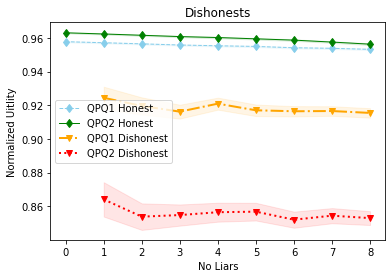

In [49]:
####################
# Sim Dishonest
####################
simresults = {'UtilityHonests1': [], 'UtilityHonests2': [], 'QPQ/QPQ2_Honests': [], 
              'UtilityDishonests1': [], 'UtilityDishonests2': [], 'QPQ/QPQ2_Dishonests': [],
              'confidence_intervalHonestsLow1': [], 'confidence_intervalHonestsLow2': [],
              'confidence_intervalDishonestsLow1': [], 'confidence_intervalDishonestsLow2': [],
              'confidence_intervalHonestsHigh1': [], 'confidence_intervalHonestsHigh2': [],
              'confidence_intervalDishonestsHigh1': [], 'confidence_intervalDishonestsHigh2': [],
              'numLiars': [] 
             }
confidence_level = 0.99

for idx0, historyLen in enumerate(historyLenArray):
    for idx1, numclusters in enumerate(numclustersArray):
        for idx2, numplayers in enumerate(numplayersArray):
            for idx3, betaFactor in enumerate(betafactorArray):
                for idx4, numLiars in enumerate(numLiarsArray):
                    if (int(numplayers/numclusters) < 2 or numplayers <= numLiars):
                        continue
         
                    dfTmp1 = df[(df.QPQversion == 1) & (df.players == numplayers) & (df.clusters == numclusters) & (df.betafactor == betaFactor) & (df.numliars == numLiars)]
                    dfTmp2 = df[(df.QPQversion == 2) & (df.players == numplayers) & (df.clusters == numclusters) & (df.betafactor == betaFactor) & (df.numliars == numLiars)]
                    
                    degrees_freedom = dfTmp1.UtilityHonest.size - 1
                    
                    UtilityHonests1 = dfTmp1.UtilityHonest.mean()
                    UtilityHonests2 = dfTmp2.UtilityHonest.mean()
                    

                    simresults['UtilityHonests1'].append(NormalizeUtility(UtilityHonests1, numplayers))
                    simresults['UtilityHonests2'].append(NormalizeUtility(UtilityHonests2, numplayers))
                    simresults['QPQ/QPQ2_Honests'].append(UtilityHonests1/UtilityHonests2)
                    
                    UtilitySEMMixHonests1 = stats.sem(dfTmp1.UtilityHonest)
                    UtilitySEMMixHonests2 = stats.sem(dfTmp2.UtilityHonest)
                    confidence_intervalH1 = stats.t.interval(confidence_level, degrees_freedom, UtilityHonests1, UtilitySEMMixHonests1)
                    confidence_intervalH2 = stats.t.interval(confidence_level, degrees_freedom, UtilityHonests2, UtilitySEMMixHonests2)

                    #print(UtilityHonests1, confidence_intervalH1[0], confidence_intervalH1[1])
                    print(UtilityHonests1, NormalizeUtility(confidence_intervalH1[0], numplayers), NormalizeUtility(confidence_intervalH1[1], numplayers))
                    simresults['confidence_intervalHonestsLow1'].append(NormalizeUtility(confidence_intervalH1[0], numplayers))
                    simresults['confidence_intervalHonestsLow2'].append(NormalizeUtility(confidence_intervalH2[0], numplayers))
                    simresults['confidence_intervalHonestsHigh1'].append(NormalizeUtility(confidence_intervalH1[1], numplayers))
                    simresults['confidence_intervalHonestsHigh2'].append(NormalizeUtility(confidence_intervalH2[1], numplayers)) 
                        
                    if (numLiars > 0):
                        UtilityMixDishonests1 = dfTmp1.UtilityDishonest.mean()
                        UtilityMixDishonests2 = dfTmp2.UtilityDishonest.mean()
                        
                        # Compute SEM Standard Error of the Mean
                        UtilitySEMMixDishonests1 = stats.sem(dfTmp1.UtilityDishonest )
                        UtilitySEMMixDishonests2 = stats.sem(dfTmp2.UtilityDishonest )

                        confidence_intervalD1 = stats.t.interval(confidence_level, degrees_freedom, UtilityMixDishonests1, UtilitySEMMixDishonests1)
                        confidence_intervalD2 = stats.t.interval(confidence_level, degrees_freedom, UtilityMixDishonests2, UtilitySEMMixDishonests2)
                        
                        simresults['UtilityDishonests1'].append(NormalizeUtility(UtilityMixDishonests1, numplayers))
                        simresults['UtilityDishonests2'].append(NormalizeUtility(UtilityMixDishonests2, numplayers))
                        simresults['QPQ/QPQ2_Dishonests'].append(UtilityMixDishonests1/UtilityMixDishonests2)
                        
                        #print(UtilityMixDishonests1, confidence_intervalD1[0], confidence_intervalD1[1])
                        simresults['confidence_intervalDishonestsLow1'].append(NormalizeUtility(confidence_intervalD1[0], numplayers))
                        simresults['confidence_intervalDishonestsLow2'].append(NormalizeUtility(confidence_intervalD2[0], numplayers))
                        simresults['confidence_intervalDishonestsHigh1'].append(NormalizeUtility(confidence_intervalD1[1], numplayers))
                        simresults['confidence_intervalDishonestsHigh2'].append(NormalizeUtility(confidence_intervalD2[1], numplayers)) 
                    else:
                        simresults['UtilityDishonests1'].append(float('NaN'))
                        simresults['UtilityDishonests2'].append(float('NaN'))
                        simresults['QPQ/QPQ2_Dishonests'].append(float('NaN'))
                        simresults['confidence_intervalDishonestsLow1'].append(float('NaN')) 
                        simresults['confidence_intervalDishonestsLow2'].append(float('NaN'))
                        simresults['confidence_intervalDishonestsHigh1'].append(float('NaN')) 
                        simresults['confidence_intervalDishonestsHigh2'].append(float('NaN'))

                    simresults['numLiars'].append(numLiars)
                    
rst = pd.DataFrame(data=simresults) 
# multiple line plot
plt.plot( 'numLiars', 'UtilityHonests1', data=rst, marker='d', color='skyblue', linestyle='--', linewidth=1, label="QPQ1 Honest")
plt.plot( 'numLiars', 'UtilityHonests2', data=rst, marker='d', color='green', linestyle='-', linewidth=1, label="QPQ2 Honest")
plt.fill_between('numLiars','confidence_intervalHonestsHigh1','confidence_intervalHonestsLow1', data=rst, color='skyblue', alpha=.10)
plt.fill_between('numLiars','confidence_intervalHonestsHigh2','confidence_intervalHonestsLow2', data=rst, color='green', alpha=.10)
plt.plot( 'numLiars', 'UtilityDishonests1', data=rst, marker='v', color='orange', linestyle='-.', linewidth=2, label="QPQ1 Dishonest")
plt.plot( 'numLiars', 'UtilityDishonests2', data=rst, marker='v', color='red', linestyle=':', linewidth=2, label="QPQ2 Dishonest")
plt.fill_between('numLiars','confidence_intervalDishonestsHigh1','confidence_intervalDishonestsLow1', data=rst, color='orange', alpha=.10)
plt.fill_between('numLiars','confidence_intervalDishonestsHigh2','confidence_intervalDishonestsLow2', data=rst, color='red', alpha=.10)
plt.title("Dishonests")
plt.xlabel("No Liars")
plt.ylabel("Normalized Uitlity");
plt.legend()
#plt.savefig(commondir + 'images/numliars.eps', format='eps')
plt.savefig(commondir + 'images/numliars.pdf', format='pdf')
rst

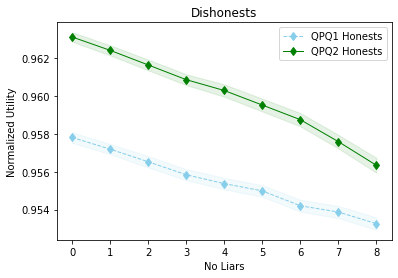

In [47]:
rst = pd.DataFrame(data=simresults)
# multiple line plot
plt.plot( 'numLiars', 'UtilityHonests1', data=rst, marker='d', color='skyblue', linestyle='--', linewidth=1, label="QPQ1 Honests")
plt.plot( 'numLiars', 'UtilityHonests2', data=rst, marker='d', color='green', linestyle='-', linewidth=1, label="QPQ2 Honests")
plt.fill_between('numLiars','confidence_intervalHonestsHigh1','confidence_intervalHonestsLow1', data=rst, color='skyblue', alpha=.10)
plt.fill_between('numLiars','confidence_intervalHonestsHigh2','confidence_intervalHonestsLow2', data=rst, color='green', alpha=.10)
plt.title("Dishonests")
plt.xlabel("No Liars")
plt.ylabel("Normalized Utility");
plt.legend()

# Sim Players

In [19]:
####################
# Sim Players
####################
dir = commondir + 'sim-players/results'

# History length
historyLenArray = [100] 
alpha = 1 

# Number of players
numplayersArray = [16, 32, 64, 128, 256]

# betafactor (dishonest beta factor) Array
betafactorArray = [1.2]

# Number of Liars
numLiarsArray = [0, 1]

# Number of clusters
numclustersArray = [8]


if not os.path.exists(dir):
    os.mkdir(dir)
    
frames=[]    
for idx0, historyLen in enumerate(historyLenArray):
    for idx1, numclusters in enumerate(numclustersArray):
        for idx2, numplayers in enumerate(numplayersArray):
            for idx3, betaFactor in enumerate(betafactorArray):
                for idx4, numLiars in enumerate(numLiarsArray):
                    if (int(numplayers/numclusters) < 2 or numplayers <= numLiars):
                        continue

                    rounds = historyLen*10
                    file_name = 'QPQRst-{0}-{1}-{2}-{3}-{4}-{5}-{6}.csv'.format(str(numplayers),str(numclusters),str(rounds),str(betaFactor),str(numLiars),str(historyLen), "*")
                    search_path = os.path.join(dir, file_name)
                    for fname in glob.glob(search_path):
                        #print("Reading file ", fname," using numplayers =", numplayers, 
                        #      " numclusters = ", numclusters, " numLiars = ", numLiars, " betafactor = ", betaFactor, " and historyLen = ", historyLen)
                        tmpdf = pd.read_csv(fname)
                        frames.append(tmpdf)
                                    
df = pd.concat(frames, ignore_index=True)
df.head(20)

,players,clusters,playerperclusters,numliars,QPQversion,alpha,rounds,betafactor,QPQHL,QPQTH,...,QPQ2HL1,QPQ2TH1,UtilityHonest,UtilityDishonest,FNTotalHonest,FNTotalDishonest,UtilityHonest_HL,UtilityDishonest_HL,FNTotalHonest_HL,FNTotalDishonest_HL
0,16,8,16,0,1,NaN,1000,1.2,100,0.97,...,NaN,NaN,0.003728,NaN,0.006250,NaN,0.003748,NaN,0.006458,NaN
1,16,8,2,0,2,1.0,1000,1.2,100,0.97,...,160.0,0.975477,0.003695,NaN,0.002437,NaN,0.003711,NaN,0.002569,NaN
2,16,8,16,0,1,NaN,1000,1.2,100,0.97,...,NaN,NaN,0.004099,NaN,0.021375,NaN,0.004148,NaN,0.023611,NaN
3,16,8,2,0,2,1.0,1000,1.2,100,0.97,...,160.0,0.975477,0.005244,NaN,0.053187,NaN,0.005409,NaN,0.058958,NaN
4,16,8,16,0,1,NaN,1000,1.2,100,0.97,...,NaN,NaN,0.003931,NaN,0.015375,NaN,0.003981,NaN,0.016736,NaN
5,16,8,2,0,2,1.0,1000,1.2,100,0.97,...,160.0,0.975477,0.003905,NaN,0.000000,NaN,0.003954,NaN,0.000000,NaN
6,16,8,16,0,1,NaN,1000,1.2,100,0.97,...,NaN,NaN,0.004095,NaN,0.017500,NaN,0.004157,NaN,0.018403,NaN
7,16,8,2,0,2,1.0,1000,1.2,100,0.97,...,160.0,0.975477,0.004272,NaN,0.018562,NaN,0.004355,NaN,0.020000,NaN
8,16,8,16,0,1,NaN,1000,1.2,100,0.97,...,NaN,NaN,0.003952,NaN,0.011062,NaN,0.004001,NaN,0.010694,NaN
9,16,8,2,0,2,1.0,1000,1.2,100,0.97,...,160.0,0.975477,0.003779,NaN,0.004938,NaN,0.003736,NaN,0.002222,NaN


In [20]:
writer = pd.ExcelWriter(commondir + 'SimPlayers.xlsx', engine='xlsxwriter')
df.to_excel(writer,index=False)
writer.save()

In [21]:
####################
# Sim Players
####################
for idx0, historyLen in enumerate(historyLenArray):
    for idx1, numclusters in enumerate(numclustersArray):
        for idx2, numplayers in enumerate(numplayersArray):
            for idx3, betaFactor in enumerate(betafactorArray):
                for idx4, numLiars in enumerate(numLiarsArray):
                    if (int(numplayers/numclusters) < 2 or numplayers <= numLiars):
                        continue

                    dfTmp1 = df[(df.QPQversion == 1) & (df.players == numplayers) & (df.clusters == numclusters) & (df.betafactor == betaFactor)]
                    dfTmp2 = df[(df.QPQversion == 2) & (df.players == numplayers) & (df.clusters == numclusters) & (df.betafactor == betaFactor)]

                    dfTmp1Honests = dfTmp1[(dfTmp1.numliars == 0)]
                    dfTmp1Mix = dfTmp1[(dfTmp1.numliars == 1)]

                    dfTmp2Honests = dfTmp2[(dfTmp2.numliars == 0)]
                    dfTmp2Mix = dfTmp2[(dfTmp2.numliars == 1)]

                    UtilityHonests1 = dfTmp1Honests.UtilityHonest.mean()
                    UtilityHonests2 = dfTmp2Honests.UtilityHonest.mean()

                    UtilityMixHonests1 = dfTmp1Mix.UtilityHonest.mean()
                    UtilityMixHonests2 = dfTmp2Mix.UtilityHonest.mean()
                    if (numLiars > 0):
                        UtilityMixDishonests1 = dfTmp1Mix.UtilityDishonest.mean()
                        UtilityMixDishonests2 = dfTmp2Mix.UtilityDishonest.mean()

                    print("\nSimulation using numplayers =", numplayers, " numclusters = ", numclusters, 
                          " numLiars = ", numLiars, " betafactor = ", betaFactor, " and historyLen = ", historyLen)
                    if dfTmp1Honests.empty or dfTmp2Honests.empty:
                        print("\tDataFrame is empty!")
                        continue
                    else:
                        print("\tDataFrame has", len( dfTmp1Honests), " simulations.")
                    print("\tPlayer Utility QPQ. All honest players: {:.5f}".format(UtilityHonests1))
                    print("\tPlayer Utility QPQ2. All honest players: {:.5f}".format(UtilityHonests2))
                    print("\tPlayer Utility Ratio QPQ/QPQ2. All honest players: {:.5f}".format(UtilityHonests1/UtilityHonests2))
                    if (numLiars > 0):
                        print("\n\tPlayer Utility QPQ. Honest players: {:.5f}, Dishonest player: {:.5f}".format(UtilityMixHonests1, UtilityMixDishonests1))
                        print("\tPlayer Utility QPQ2. Honest players: {:.5f}, Dishonest player: {:.5f}".format(UtilityMixHonests2, UtilityMixDishonests2))
                        print("\tPlayer Utility Ratio QPQ/QPQ2. Honest players: {:.5f}, Dishonest player: {:.5f}".format(UtilityMixHonests1/UtilityMixHonests2, UtilityMixDishonests1/UtilityMixDishonests2))


Simulation using numplayers = 16  numclusters =  8  numLiars =  0  betafactor =  1.2  and historyLen =  100
	DataFrame has 3050  simulations.
	Player Utility QPQ. All honest players: 0.00401
	Player Utility QPQ2. All honest players: 0.00413
	Player Utility Ratio QPQ/QPQ2. All honest players: 0.97103

Simulation using numplayers = 16  numclusters =  8  numLiars =  1  betafactor =  1.2  and historyLen =  100
	DataFrame has 3050  simulations.
	Player Utility QPQ. All honest players: 0.00401
	Player Utility QPQ2. All honest players: 0.00413
	Player Utility Ratio QPQ/QPQ2. All honest players: 0.97103

	Player Utility QPQ. Honest players: 0.00415, Dishonest player: 0.00393
	Player Utility QPQ2. Honest players: 0.00432, Dishonest player: 0.00509
	Player Utility Ratio QPQ/QPQ2. Honest players: 0.96177, Dishonest player: 0.77190

Simulation using numplayers = 32  numclusters =  8  numLiars =  0  betafactor =  1.2  and historyLen =  100
	DataFrame has 3050  simulations.
	Player Utility QPQ. All

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


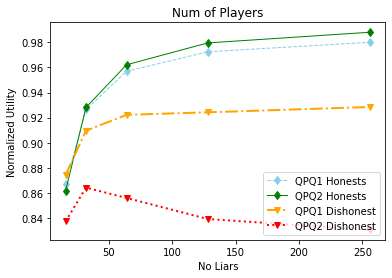

In [22]:
####################
# Sim Players
####################
simresults = {'UtilityHonests1': [], 'UtilityHonests2': [], 'QPQ/QPQ2_Honests': [], 
              'UtilityDishonests1': [], 'UtilityDishonests2': [], 'QPQ/QPQ2_Dishonests': [],
              'confidence_intervalHonestsLow1': [], 'confidence_intervalHonestsLow2': [],
              'confidence_intervalDishonestsLow1': [], 'confidence_intervalDishonestsLow2': [],
              'confidence_intervalHonestsHigh1': [], 'confidence_intervalHonestsHigh2': [],
              'confidence_intervalDishonestsHigh1': [], 'confidence_intervalDishonestsHigh2': [],
              'numplayers': [] 
             }
for idx0, historyLen in enumerate(historyLenArray):
    for idx1, numclusters in enumerate(numclustersArray):
        for idx2, numplayers in enumerate(numplayersArray):
            for idx3, betaFactor in enumerate(betafactorArray):
                for idx4, numLiars in enumerate([1]):
                    if (int(numplayers/numclusters) < 2 or numplayers <= numLiars):
                        continue
         
                    dfTmp1 = df[(df.QPQversion == 1) & (df.players == numplayers) & (df.clusters == numclusters) & (df.betafactor == betaFactor) & (df.numliars == numLiars)]
                    dfTmp2 = df[(df.QPQversion == 2) & (df.players == numplayers) & (df.clusters == numclusters) & (df.betafactor == betaFactor) & (df.numliars == numLiars)]

                    UtilityHonests1 = dfTmp1.UtilityHonest.mean()
                    UtilityHonests2 = dfTmp2.UtilityHonest.mean()

                    simresults['UtilityHonests1'].append(NormalizeUtility(UtilityHonests1, numplayers))
                    simresults['UtilityHonests2'].append(NormalizeUtility(UtilityHonests2, numplayers))
                    simresults['QPQ/QPQ2_Honests'].append(UtilityHonests1/UtilityHonests2)

                    if (numLiars > 0):
                        UtilityMixDishonests1 = dfTmp1.UtilityDishonest.mean()
                        UtilityMixDishonests2 = dfTmp2.UtilityDishonest.mean()

                        simresults['UtilityDishonests1'].append(NormalizeUtility(UtilityMixDishonests1, numplayers))
                        simresults['UtilityDishonests2'].append(NormalizeUtility(UtilityMixDishonests2, numplayers))
                        simresults['QPQ/QPQ2_Dishonests'].append(UtilityMixDishonests1/UtilityMixDishonests2)
                    else:
                        simresults['UtilityDishonests1'].append(float('NaN'))
                        simresults['UtilityDishonests2'].append(float('NaN'))
                        simresults['QPQ/QPQ2_Dishonests'].append(float('NaN'))

                    simresults['numplayers'].append(numplayers)
                    
                    
rst = pd.DataFrame(data=simresults) 
# multiple line plot
plt.plot( 'numplayers', 'UtilityHonests1', data=rst, marker='d', color='skyblue', linestyle='--', linewidth=1, label="QPQ1 Honests")
plt.plot( 'numplayers', 'UtilityHonests2', data=rst, marker='d', color='green', linestyle='-', linewidth=1, label="QPQ2 Honests")
plt.plot( 'numplayers', 'UtilityDishonests1', data=rst, marker='v', color='orange', linestyle='-.', linewidth=2, label="QPQ1 Dishonest")
plt.plot( 'numplayers', 'UtilityDishonests2', data=rst, marker='v', color='red', linestyle=':', linewidth=2, label="QPQ2 Dishonest")
plt.title("Num of Players")
plt.xlabel("No Liars")
plt.ylabel("Normalized Utility");
plt.legend()
#plt.savefig(commondir + 'images/numplayers.eps', format='eps')
plt.savefig(commondir + 'images/numplayers.pdf', format='pdf')

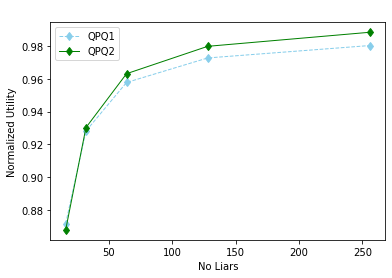

In [23]:
simresults = {'UtilityHonests1': [], 'UtilityHonests2': [], 'QPQ/QPQ2_Honests': [], 
              'UtilityDishonests1': [], 'UtilityDishonests2': [], 'QPQ/QPQ2_Dishonests': [],
              'confidence_intervalHonestsLow1': [], 'confidence_intervalHonestsLow2': [],
              'confidence_intervalDishonestsLow1': [], 'confidence_intervalDishonestsLow2': [],
              'confidence_intervalHonestsHigh1': [], 'confidence_intervalHonestsHigh2': [],
              'confidence_intervalDishonestsHigh1': [], 'confidence_intervalDishonestsHigh2': [],
              'numplayers': [] 
             }
for idx0, historyLen in enumerate(historyLenArray):
    for idx1, numclusters in enumerate(numclustersArray):
        for idx2, numplayers in enumerate(numplayersArray):
            for idx3, betaFactor in enumerate(betafactorArray):
                for idx4, numLiars in enumerate([0]):
                    if (int(numplayers/numclusters) < 2 or numplayers <= numLiars):
                        continue
         
                    dfTmp1 = df[(df.QPQversion == 1) & (df.players == numplayers) & (df.clusters == numclusters) & (df.betafactor == betaFactor) & (df.numliars == numLiars)]
                    dfTmp2 = df[(df.QPQversion == 2) & (df.players == numplayers) & (df.clusters == numclusters) & (df.betafactor == betaFactor) & (df.numliars == numLiars)]

                    UtilityHonests1 = dfTmp1.UtilityHonest.mean()
                    UtilityHonests2 = dfTmp2.UtilityHonest.mean()
                    
                    simresults['UtilityHonests1'].append(NormalizeUtility(UtilityHonests1, numplayers))
                    simresults['UtilityHonests2'].append(NormalizeUtility(UtilityHonests2, numplayers))
                    simresults['QPQ/QPQ2_Honests'].append(UtilityHonests1/UtilityHonests2)
                    if (numLiars > 0):
                        UtilityMixDishonests1 = dfTmp1.UtilityDishonest.mean()
                        UtilityMixDishonests2 = dfTmp2.UtilityDishonest.mean()

                        simresults['UtilityDishonests1'].append(NormalizeUtility(UtilityMixDishonests1, numplayers))
                        simresults['UtilityDishonests2'].append(NormalizeUtility(UtilityMixDishonests2, numplayers))
                        simresults['QPQ/QPQ2_Dishonests'].append(UtilityMixDishonests1/UtilityMixDishonests2)
                    else:
                        simresults['UtilityDishonests1'].append(0)
                        simresults['UtilityDishonests2'].append(0)
                        simresults['QPQ/QPQ2_Dishonests'].append(1)

                    simresults['numplayers'].append(numplayers)
                    
rst = pd.DataFrame(data=simresults)
# multiple line plot
plt.plot( 'numplayers', 'UtilityHonests1', data=rst, marker='d', color='skyblue', linestyle='--', linewidth=1, label="QPQ1")
plt.plot( 'numplayers', 'UtilityHonests2', data=rst, marker='d', color='green', linestyle='-', linewidth=1, label="QPQ2")
plt.title(" ")
plt.xlabel("No Liars")
plt.ylabel("Normalized Utility");
plt.legend()

# Sim History Length

In [16]:
####################
# Sim History Len
####################
dir = commondir + 'sim-history/results'

# History length
historyLenArray = [100, 300, 1000, 3000] 
alpha = 1 

# Number of players
numplayersArray = [64]

# betafactor (dishonest beta factor) Array
betafactorArray = [1.2]

# Number of Liars
numLiarsArray = [1]

# Number of clusters
numclustersArray = [8]


if not os.path.exists(dir):
    os.mkdir(dir)
    
frames=[]    
for idx0, historyLen in enumerate(historyLenArray):
    for idx1, numclusters in enumerate(numclustersArray):
        for idx2, numplayers in enumerate(numplayersArray):
            for idx3, betaFactor in enumerate(betafactorArray):
                for idx4, numLiars in enumerate(numLiarsArray):
                    if (int(numplayers/numclusters) < 2 or numplayers <= numLiars):
                        continue

                    rounds = historyLen*10
                    file_name = 'QPQRst-{0}-{1}-{2}-{3}-{4}-{5}-{6}.csv'.format(str(numplayers),str(numclusters),str(rounds),str(betaFactor),str(numLiars),str(historyLen), "*")
                    search_path = os.path.join(dir, file_name)
                    for fname in glob.glob(search_path):
                        #print("Reading file ", fname," using numplayers =", numplayers, 
                        #      " numclusters = ", numclusters, " numLiars = ", numLiars, " betafactor = ", betaFactor, " and historyLen = ", historyLen)
                        tmpdf = pd.read_csv(fname)
                        frames.append(tmpdf)
                                    
df = pd.concat(frames, ignore_index=True)
df.head(20)

,players,clusters,playerperclusters,numliars,QPQversion,alpha,rounds,betafactor,QPQHL,QPQTH,...,QPQ2HL1,QPQ2TH1,UtilityHonest,UtilityDishonest,FNTotalHonest,FNTotalDishonest,UtilityHonest_HL,UtilityDishonest_HL,FNTotalHonest_HL,FNTotalDishonest_HL
0,64,8,64,1,1,NaN,1000,1.2,100,0.97,...,NaN,NaN,0.000317,0.000033,0.009794,0.116,0.000301,0.000036,0.009877,0.126667
1,64,8,8,1,2,1.0,1000,1.2,100,0.97,...,400.0,0.981637,0.000294,0.001689,0.000000,0.000,0.000292,0.001877,0.000000,0.000000
2,64,8,64,1,1,NaN,1000,1.2,100,0.97,...,NaN,NaN,0.000410,0.000096,0.012492,0.027,0.000423,0.000106,0.012875,0.030000
3,64,8,8,1,2,1.0,1000,1.2,100,0.97,...,400.0,0.981637,0.000306,0.000647,0.000524,0.000,0.000314,0.000718,0.000476,0.000000
4,64,8,64,1,1,NaN,1000,1.2,100,0.97,...,NaN,NaN,0.000334,0.000057,0.012714,0.031,0.000326,0.000060,0.012857,0.034444
5,64,8,8,1,2,1.0,1000,1.2,100,0.97,...,400.0,0.981637,0.000268,0.000505,0.000302,0.000,0.000269,0.000558,0.000212,0.000000
6,64,8,64,1,1,NaN,1000,1.2,100,0.97,...,NaN,NaN,0.000365,0.002051,0.013016,0.024,0.000381,0.002279,0.013051,0.026667
7,64,8,8,1,2,1.0,1000,1.2,100,0.97,...,400.0,0.981637,0.000279,0.001319,0.000048,0.000,0.000272,0.001465,0.000000,0.000000
8,64,8,64,1,1,NaN,1000,1.2,100,0.97,...,NaN,NaN,0.000306,0.001629,0.011127,0.108,0.000314,0.001804,0.011199,0.120000
9,64,8,8,1,2,1.0,1000,1.2,100,0.97,...,400.0,0.981637,0.000331,0.000331,0.002683,0.001,0.000343,0.000362,0.002716,0.000000


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


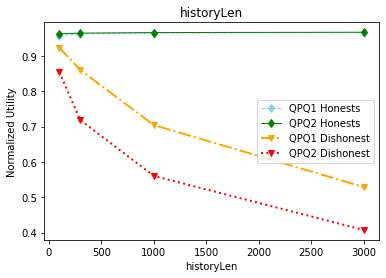

In [17]:
####################
# Sim History Len
####################
simresults = {'UtilityHonests1': [], 'UtilityHonests2': [], 'QPQ/QPQ2_Honests': [], 
              'UtilityDishonests1': [], 'UtilityDishonests2': [], 'QPQ/QPQ2_Dishonests': [],
              'confidence_intervalHonestsLow1': [], 'confidence_intervalHonestsLow2': [],
              'confidence_intervalDishonestsLow1': [], 'confidence_intervalDishonestsLow2': [],
              'confidence_intervalHonestsHigh1': [], 'confidence_intervalHonestsHigh2': [],
              'confidence_intervalDishonestsHigh1': [], 'confidence_intervalDishonestsHigh2': [],
              'historyLen': [] 
             }
for idx0, historyLen in enumerate(historyLenArray):
    for idx1, numclusters in enumerate(numclustersArray):
        for idx2, numplayers in enumerate(numplayersArray):
            for idx3, betaFactor in enumerate(betafactorArray):
                for idx4, numLiars in enumerate(numLiarsArray):
                    if (int(numplayers/numclusters) < 2 or numplayers <= numLiars):
                        continue
         
                    dfTmp1 = df[(df.QPQversion == 1) & (df.players == numplayers) & (df.clusters == numclusters) & (df.betafactor == betaFactor) & (df.numliars == numLiars) & (df.QPQHL == historyLen)]
                    dfTmp2 = df[(df.QPQversion == 2) & (df.players == numplayers) & (df.clusters == numclusters) & (df.betafactor == betaFactor) & (df.numliars == numLiars) & (df.QPQHL == historyLen)]
                    
                    UtilityHonests1 = dfTmp1.UtilityHonest.mean()
                    UtilityHonests2 = dfTmp2.UtilityHonest.mean()

                    simresults['UtilityHonests1'].append(NormalizeUtility(UtilityHonests1, numplayers))
                    simresults['UtilityHonests2'].append(NormalizeUtility(UtilityHonests2, numplayers))
                    simresults['QPQ/QPQ2_Honests'].append(UtilityHonests1/UtilityHonests2)

                    if (numLiars > 0):
                        UtilityMixDishonests1 = dfTmp1.UtilityDishonest.mean()
                        UtilityMixDishonests2 = dfTmp2.UtilityDishonest.mean()

                        simresults['UtilityDishonests1'].append(NormalizeUtility(UtilityMixDishonests1, numplayers))
                        simresults['UtilityDishonests2'].append(NormalizeUtility(UtilityMixDishonests2, numplayers))
                        simresults['QPQ/QPQ2_Dishonests'].append(UtilityMixDishonests1/UtilityMixDishonests2)
                    else:
                        simresults['UtilityDishonests1'].append(0)
                        simresults['UtilityDishonests2'].append(0)
                        simresults['QPQ/QPQ2_Dishonests'].append(1)

                    simresults['historyLen'].append(historyLen)
                    
rst = pd.DataFrame(data=simresults)
# multiple line plot
plt.plot( 'historyLen', 'UtilityHonests1', data=rst, marker='d', color='skyblue', linestyle='--', linewidth=1, label="QPQ1 Honests")
plt.plot( 'historyLen', 'UtilityHonests2', data=rst, marker='d', color='green', linestyle='-', linewidth=1, label="QPQ2 Honests")
plt.plot( 'historyLen', 'UtilityDishonests1', data=rst, marker='v', color='orange', linestyle='-.', linewidth=2, label="QPQ1 Dishonest")
plt.plot( 'historyLen', 'UtilityDishonests2', data=rst, marker='v', color='red', linestyle=':', linewidth=2, label="QPQ2 Dishonest")
plt.title("historyLen")
plt.xlabel("historyLen")
plt.ylabel("Normalized Utility");
plt.legend()
#plt.savefig(commondir + 'images/historylen.eps', format='eps')
plt.savefig(commondir + 'images/historylen.pdf', format='pdf')

In [39]:
##########################
# Sim History Len Beta1.05
#########################
dir = commondir + 'sim-history-beta1.05-v2/results'

# History length
historyLenArray = [100, 200, 300, 400, 500, 600, 700, 800, 900]#, 1000] 
alpha = 1 

# Number of players
numplayersArray = [64]

# betafactor (dishonest beta factor) Array
betafactorArray = [1.05]

# Number of Liars
numLiarsArray = [1]

# Number of clusters
numclustersArray = [8]


if not os.path.exists(dir):
    os.mkdir(dir)
    
frames=[]    
for idx0, historyLen in enumerate(historyLenArray):
    for idx1, numclusters in enumerate(numclustersArray):
        for idx2, numplayers in enumerate(numplayersArray):
            for idx3, betaFactor in enumerate(betafactorArray):
                for idx4, numLiars in enumerate(numLiarsArray):
                    if (int(numplayers/numclusters) < 2 or numplayers <= numLiars):
                        continue

                    rounds = historyLen*10
                    file_name = 'QPQRst-{0}-{1}-{2}-{3}-{4}-{5}-{6}.csv'.format(str(numplayers),str(numclusters),str(rounds),str(betaFactor),str(numLiars),str(historyLen), "*")
                    search_path = os.path.join(dir, file_name)
                    for fname in glob.glob(search_path):
                        #print("Reading file ", fname," using numplayers =", numplayers, 
                        #      " numclusters = ", numclusters, " numLiars = ", numLiars, " betafactor = ", betaFactor, " and historyLen = ", historyLen)
                        tmpdf = pd.read_csv(fname)
                        frames.append(tmpdf)
                                    
df = pd.concat(frames, ignore_index=True)
df.head(20)

,FNTotalDishonest,FNTotalDishonest_HL,FNTotalHonest,FNTotalHonest_HL,QPQ2HL0,QPQ2HL1,QPQ2TH0,QPQ2TH1,QPQHL,QPQTH,...,UtilityDishonest_HL,UtilityHonest,UtilityHonest_HL,alpha,betafactor,clusters,numliars,playerperclusters,players,rounds
0,0.000,0.013333,0.013365,0.013545,NaN,NaN,NaN,NaN,100,0.97,...,0.000192,0.000391,0.000389,NaN,1.05,8,1,64,64,1000
1,0.001,0.000000,0.001254,0.001199,400.0,400.0,0.981637,0.981637,100,0.97,...,0.000192,0.000337,0.000335,1.0,1.05,8,1,8,64,1000
2,0.022,0.000000,0.011444,0.011534,NaN,NaN,NaN,NaN,100,0.97,...,0.000298,0.000381,0.000348,NaN,1.05,8,1,64,64,1000
3,0.001,0.000000,0.005333,0.005397,400.0,400.0,0.981637,0.981637,100,0.97,...,0.000280,0.000309,0.000310,1.0,1.05,8,1,8,64,1000
4,0.005,0.000000,0.013635,0.014356,NaN,NaN,NaN,NaN,100,0.97,...,0.000181,0.000355,0.000353,NaN,1.05,8,1,64,64,1000
5,0.000,0.000000,0.001365,0.000776,400.0,400.0,0.981637,0.981637,100,0.97,...,0.000192,0.000343,0.000335,1.0,1.05,8,1,8,64,1000
6,0.004,0.010000,0.010937,0.010741,NaN,NaN,NaN,NaN,100,0.97,...,0.000383,0.000341,0.000354,NaN,1.05,8,1,64,64,1000
7,0.000,0.000000,0.004508,0.004991,400.0,400.0,0.981637,0.981637,100,0.97,...,0.000356,0.000270,0.000258,1.0,1.05,8,1,8,64,1000
8,0.007,0.003333,0.011413,0.011869,NaN,NaN,NaN,NaN,100,0.97,...,0.000197,0.000332,0.000343,NaN,1.05,8,1,64,64,1000
9,0.000,0.000000,0.000508,0.000035,400.0,400.0,0.981637,0.981637,100,0.97,...,0.000141,0.000266,0.000269,1.0,1.05,8,1,8,64,1000


0.00029245685809009325 0.00020539668623018557 0.0003795170299500009
0.00029856605426502645 0.00022819686585106105 0.00036893524267899184
0.000301633096862236 0.00024570616214210914 0.00035756003158236285
0.00029900182105026594 0.00023931442460064674 0.0003586892174998851
0.0003951432420310052 0.0003121632516070537 0.00047812323245495665
0.0003164171091440746 0.0002612103949449651 0.0003716238233431842
0.00034741412420317025 0.00028744833586403314 0.0004073799125423074
0.0003491948922975411 0.00029524493351282206 0.0004031448510822601
0.0003719567663637026 0.000308769032859585 0.0004351444998678202


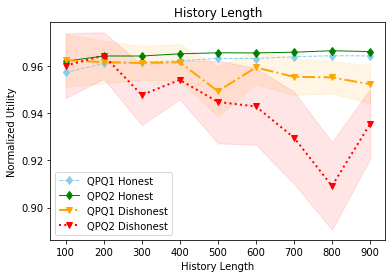

In [42]:
##########################
# Sim History Len Beta1.05
#########################
simresults = {'UtilityHonests1': [], 'UtilityHonests2': [], 'QPQ/QPQ2_Honests': [], 
              'UtilityDishonests1': [], 'UtilityDishonests2': [], 'QPQ/QPQ2_Dishonests': [],
              'confidence_intervalHonestsLow1': [], 'confidence_intervalHonestsLow2': [],
              'confidence_intervalDishonestsLow1': [], 'confidence_intervalDishonestsLow2': [],
              'confidence_intervalHonestsHigh1': [], 'confidence_intervalHonestsHigh2': [],
              'confidence_intervalDishonestsHigh1': [], 'confidence_intervalDishonestsHigh2': [],
              'historyLen': [] 
             }
for idx0, historyLen in enumerate(historyLenArray):
    for idx1, numclusters in enumerate(numclustersArray):
        for idx2, numplayers in enumerate(numplayersArray):
            for idx3, betaFactor in enumerate(betafactorArray):
                for idx4, numLiars in enumerate(numLiarsArray):
                    if (int(numplayers/numclusters) < 2 or numplayers <= numLiars):
                        continue
         
                    dfTmp1 = df[(df.QPQversion == 1) & (df.players == numplayers) & (df.clusters == numclusters) & (df.betafactor == betaFactor) & (df.numliars == numLiars) & (df.QPQHL == historyLen)]
                    dfTmp2 = df[(df.QPQversion == 2) & (df.players == numplayers) & (df.clusters == numclusters) & (df.betafactor == betaFactor) & (df.numliars == numLiars) & (df.QPQHL == historyLen)]
                    
                    UtilityHonests1 = dfTmp1.UtilityHonest.mean()
                    UtilityHonests2 = dfTmp2.UtilityHonest.mean()

                    simresults['UtilityHonests1'].append(NormalizeUtility(UtilityHonests1, numplayers))
                    simresults['UtilityHonests2'].append(NormalizeUtility(UtilityHonests2, numplayers))
                    simresults['QPQ/QPQ2_Honests'].append(UtilityHonests1/UtilityHonests2)
                    
                    UtilitySEMMixHonests1 = stats.sem(dfTmp1.UtilityHonest)
                    UtilitySEMMixHonests2 = stats.sem(dfTmp2.UtilityHonest)
                    confidence_intervalH1 = stats.t.interval(confidence_level, degrees_freedom, UtilityHonests1, UtilitySEMMixHonests1)
                    confidence_intervalH2 = stats.t.interval(confidence_level, degrees_freedom, UtilityHonests2, UtilitySEMMixHonests2)

                    #print(UtilityHonests1, NormalizeUtility(confidence_intervalH1[0], numplayers), NormalizeUtility(confidence_intervalH1[1], numplayers))
                    simresults['confidence_intervalHonestsLow1'].append(NormalizeUtility(confidence_intervalH1[0], numplayers))
                    simresults['confidence_intervalHonestsLow2'].append(NormalizeUtility(confidence_intervalH2[0], numplayers))
                    simresults['confidence_intervalHonestsHigh1'].append(NormalizeUtility(confidence_intervalH1[1], numplayers))
                    simresults['confidence_intervalHonestsHigh2'].append(NormalizeUtility(confidence_intervalH2[1], numplayers)) 

                    if (numLiars > 0):
                        UtilityMixDishonests1 = dfTmp1.UtilityDishonest.mean()
                        UtilityMixDishonests2 = dfTmp2.UtilityDishonest.mean()

                        simresults['UtilityDishonests1'].append(NormalizeUtility(UtilityMixDishonests1, numplayers))
                        simresults['UtilityDishonests2'].append(NormalizeUtility(UtilityMixDishonests2, numplayers))
                        simresults['QPQ/QPQ2_Dishonests'].append(UtilityMixDishonests1/UtilityMixDishonests2)
                        
                         # Compute SEM Standard Error of the Mean
                        UtilitySEMMixDishonests1 = stats.sem(dfTmp1.UtilityDishonest )
                        UtilitySEMMixDishonests2 = stats.sem(dfTmp2.UtilityDishonest )

                        confidence_intervalD1 = stats.t.interval(confidence_level, degrees_freedom, UtilityMixDishonests1, UtilitySEMMixDishonests1)
                        confidence_intervalD2 = stats.t.interval(confidence_level, degrees_freedom, UtilityMixDishonests2, UtilitySEMMixDishonests2)
                        
                        print(UtilityMixDishonests1, confidence_intervalD1[0], confidence_intervalD1[1])
                        simresults['confidence_intervalDishonestsLow1'].append(NormalizeUtility(confidence_intervalD1[0], numplayers))
                        simresults['confidence_intervalDishonestsLow2'].append(NormalizeUtility(confidence_intervalD2[0], numplayers))
                        simresults['confidence_intervalDishonestsHigh1'].append(NormalizeUtility(confidence_intervalD1[1], numplayers))
                        simresults['confidence_intervalDishonestsHigh2'].append(NormalizeUtility(confidence_intervalD2[1], numplayers)) 
                    else:
                        simresults['UtilityDishonests1'].append(0)
                        simresults['UtilityDishonests2'].append(0)
                        simresults['QPQ/QPQ2_Dishonests'].append(1)
                        simresults['confidence_intervalDishonestsLow1'].append(0) 
                        simresults['confidence_intervalDishonestsLow2'].append(0)
                        simresults['confidence_intervalDishonestsHigh1'].append(0) 
                        simresults['confidence_intervalDishonestsHigh2'].append(0)

                    simresults['historyLen'].append(historyLen)
                    
rst = pd.DataFrame(data=simresults)
# multiple line plot
plt.plot( 'historyLen', 'UtilityHonests1', data=rst, marker='d', color='skyblue', linestyle='--', linewidth=1, label="QPQ1 Honest")
plt.plot( 'historyLen', 'UtilityHonests2', data=rst, marker='d', color='green', linestyle='-', linewidth=1, label="QPQ2 Honest")
#plt.fill_between('historyLen','confidence_intervalHonestsHigh1','confidence_intervalHonestsLow1', data=rst, color='skyblue', alpha=.10)
#plt.fill_between('historyLen','confidence_intervalHonestsHigh2','confidence_intervalHonestsLow2', data=rst, color='green', alpha=.10)
plt.plot( 'historyLen', 'UtilityDishonests1', data=rst, marker='v', color='orange', linestyle='-.', linewidth=2, label="QPQ1 Dishonest")
plt.plot( 'historyLen', 'UtilityDishonests2', data=rst, marker='v', color='red', linestyle=':', linewidth=2, label="QPQ2 Dishonest")
plt.fill_between('historyLen','confidence_intervalDishonestsHigh1','confidence_intervalDishonestsLow1', data=rst, color='orange', alpha=.10)
plt.fill_between('historyLen','confidence_intervalDishonestsHigh2','confidence_intervalDishonestsLow2', data=rst, color='red', alpha=.10)
plt.title("History Length")
plt.xlabel("History Length")
plt.ylabel("Normalized Utility");
plt.legend()
#plt.savefig(commondir + 'images/historylenbeta1.05.eps', format='eps')
plt.savefig(commondir + 'images/historylenbeta1.05.pdf', format='pdf')